In [4]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import spacy_universal_sentence_encoder

In [5]:
phrase = 'Организация, компания, предприятие'
#phrase = 'Покажи организации из Минска и Пинска в таблице'
words = ['организация', 'компания', 'предприятие', 'фирма', 'юридическое лицо', 'завод', 'комбинат']
#words = ["show", "update", "insert", "delete", "select"]
cnt = len(words)
matrix = np.zeros( (cnt, cnt) )

In [6]:
models_names = [["ru_core_news_lg", 1], ["xx_use_lg", 2], ["en_use_lg", 2]]

ru_core_news_lg


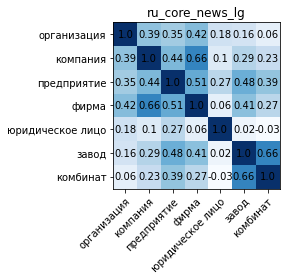

Похожесть относительно фразы: Организация, компания, предприятие
[['предприятие' '0.8549993063834663']
 ['компания' '0.8413735780713228']
 ['фирма' '0.6875831879176105']
 ['завод' '0.4574884719703743']
 ['организация' '0.43539007424002524']
 ['комбинат' '0.3623270138265142']
 ['юридическое лицо' '0.22203074944977466']]
xx_use_lg
Downloaded https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3, Total size: 334.32MB



FileNotFoundError: Op type not registered 'SentencepieceOp' in binary running on LENOVO16. Make sure the Op and Kernel are registered in the binary running in this process. Note that if you are loading a saved graph which used ops from tf.contrib, accessing (e.g.) `tf.contrib.resampler` should be done before importing the graph, as contrib ops are lazily registered when the module is first accessed.
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [7]:
for model in models_names:
    print(model[0])

    if (model[1] == 1):
        nlp = spacy.load(model[0])
    else:    
        nlp = spacy_universal_sentence_encoder.load_model(model[0])

    for w1 in words:
        doc1 = nlp(w1)
        for w2 in words:
            doc2 = nlp(w2)
            matrix[words.index(w1), words.index(w2)] = doc1.similarity(doc2)

    fig, ax = plt.subplots()
    ax.imshow(matrix, cmap=plt.cm.Blues)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(cnt), labels=words)
    ax.set_yticks(np.arange(cnt), labels=words)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    for i in range(cnt):
        for j in range(cnt):
            c = round(matrix[i,j], 2)
            ax.text(i, j, str(c), va='center', ha='center')      

    ax.set_title(model[0])
    fig.tight_layout()
    plt.show()          

    doc2 = nlp(phrase)
    arr1 = np.empty(cnt)
    arr2 = np.array(words)
    for w1 in words:
        doc1 = nlp(w1)
        arr1[words.index(w1)] = doc1.similarity(doc2)

    arr1inds = arr1.argsort()
    sorted_arr1 = arr1[arr1inds[::-1]]
    sorted_arr2 = arr2[arr1inds[::-1]]
    print("Похожесть относительно фразы: " + phrase)
    print(np.transpose(np.array([sorted_arr2, sorted_arr1])))
